# Preliminary data viz



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
"""
    Gets the path for a file INSIDE "data" -folder.
"""
def get_path(filename):
    path_prefix = os.getcwd().split('intro-to-data-visualization-project')[0]
    return os.path.join(path_prefix, "intro-to-data-visualization-project", "data", filename)

def read_files(publisher, polls):
    res = pd.DataFrame()
    for p in polls:
        df = pd.read_csv(get_path('separated/polls-{}-{}.csv'.format(publisher, p)))
        df.insert(0, 'Publisher', publisher)
        df.insert(0, 'Election', 'parliamentary_{}'.format(p))
        res = res.append(df)
    return res

In [29]:
def p2f(x):
    return float(x.strip('%'))/100

converters = {
    'CON': p2f,
    'LAB': p2f,
    'LIB DEM': p2f,
    'OTHER': p2f,
    'CON LEAD OVER LABOUR (percentage points)': p2f
}
gdff = pd.read_csv(get_path('orig/All Guardian_ICM poll results - STATE OF THE PARTIES.csv'), converters=converters)
gdff['End of fieldwork/ election date'] = pd.to_datetime(gdff['End of fieldwork/ election date'])
#gdff = pd.read_csv(get_path('orig/All Guardian_ICM poll results - STATE OF THE PARTIES.csv'))

In [65]:
gdff_edays = gdff[gdff['Sample'].str.contains('GENERAL ELECTION RESULT', na=False)]
gdff_edays

,Election,End of fieldwork/ election date,CON,LAB,LIB DEM,OTHER,CON LEAD OVER LABOUR (percentage points),Sample,Fieldwork dates
41,general_1987,1987-11-06,0.4300,0.3200,0.2300,0.0200,0.110,GENERAL ELECTION RESULT - 11 June 1987,NaN
99,general_1992,1992-09-04,0.4300,0.3500,0.1800,0.0400,0.080,"GENERAL ELECTION RESULT - 9 April, 1992",NaN
164,general_1997,1997-01-05,0.3140,0.4440,0.1720,0.0700,-0.130,"GENERAL ELECTION RESULT - 1 May, 1997",NaN
221,general_2001,2001-07-06,0.3270,0.4200,0.1880,0.0650,-0.093,GENERAL ELECTION RESULT - 7 June 2001,NaN
272,general_2005,2005-05-05,0.3320,0.3620,0.2260,0.0800,-0.030,"GENERAL ELECTION RESULT - 5 May, 2005",NaN
338,general_2010,2010-06-05,0.3645,0.2901,0.2303,0.1195,0.070,"GENERAL ELECTION RESULT - 6 May, 2010",NaN
403,general_2015,2015-07-05,0.3780,0.3120,0.0810,0.2300,0.066,"GENERAL ELECTION RESULT - 7 May, 2015",NaN


In [30]:
gdff.head()

,Election,End of fieldwork/ election date,CON,LAB,LIB DEM,OTHER,CON LEAD OVER LABOUR (percentage points),Sample,Fieldwork dates
0,general_1987,1984-06-15,0.37,0.38,0.23,0.02,-0.01,NaN,"June, 1984"
1,general_1987,1984-07-15,0.34,0.39,0.26,0.01,-0.05,NaN,"July, 1984"
2,general_1987,1984-08-15,0.36,0.39,0.24,0.01,-0.03,NaN,"Aug, 1984"
3,general_1987,1984-09-15,0.39,0.38,0.21,0.02,0.01,NaN,Sep 1984
4,general_1987,1984-10-15,0.38,0.36,0.24,0.02,0.02,NaN,"Oct, 1984"


In [37]:
d = gdff[['Election', 'CON', 'LAB', 'LIB DEM', 'OTHER', 'End of fieldwork/ election date']]
d = d.set_index('End of fieldwork/ election date')
d.head()
#d = pd.DataFrame(gdff[['Election', 'CON', 'LAB']], gdff[['End of fieldwork/ election date']])

,Election,CON,LAB,LIB DEM,OTHER
End of fieldwork/ election date,,,,,
1984-06-15,general_1987,0.37,0.38,0.23,0.02
1984-07-15,general_1987,0.34,0.39,0.26,0.01
1984-08-15,general_1987,0.36,0.39,0.24,0.01
1984-09-15,general_1987,0.39,0.38,0.21,0.02
1984-10-15,general_1987,0.38,0.36,0.24,0.02


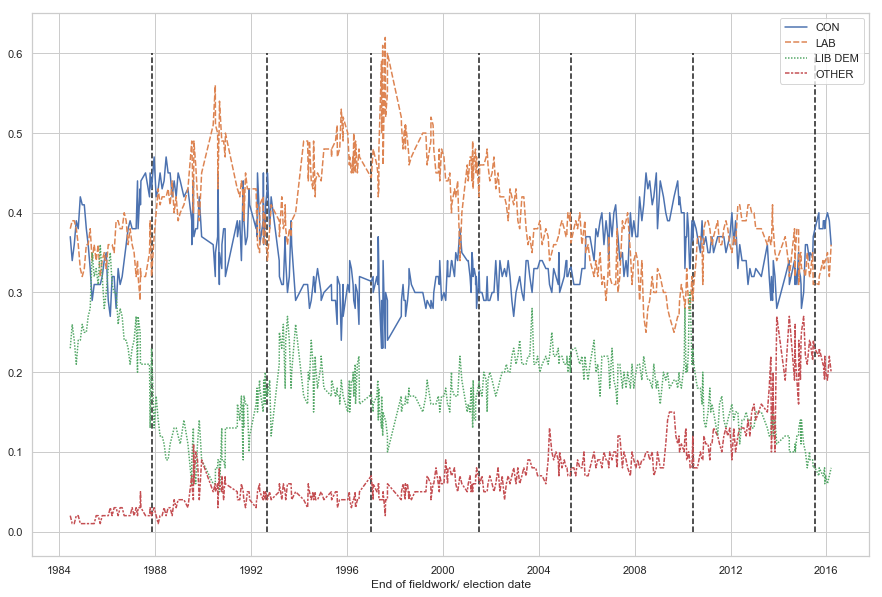

In [73]:
de = d.drop(columns=['Election'])

plt.figure(figsize=(15,10))
plot = sns.lineplot(data=de)
ax = plot.axes
ax.vlines(gdff_edays['End of fieldwork/ election date'], 0, 0.6, linestyles="dashed")
fig = plot.get_figure()
#fig.savefig("general-election-polls.png")

In [32]:
dd = d[d['Election'] == 'general_1987']
dd = dd[['CON', 'LAB']]
dd.head()

,CON,LAB
End of fieldwork/ election date,,
1984-06-15,0.37,0.38
1984-07-15,0.34,0.39
1984-08-15,0.36,0.39
1984-09-15,0.39,0.38
1984-10-15,0.38,0.36


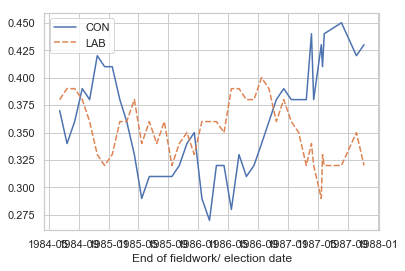

In [33]:
sns.lineplot(data=dd)

/Users/teemu/.virtualenvs/idv-project/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


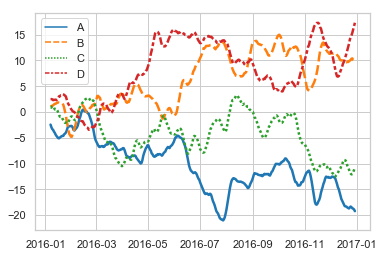

In [6]:
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [58]:
gdf = read_files('guardian', [1987, 1992, 1997, 2001, 2005, 2010])

In [68]:
gdf_num = gdf[~gdf['Before election'].isin(['Actual Share of Vote', 'Actual Number of Seats', 'Actual Share of Seats'])]

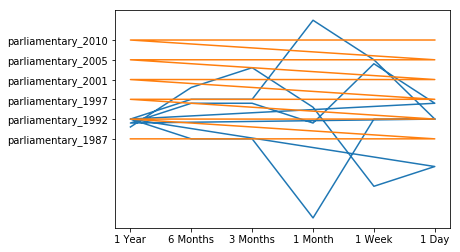

In [75]:
plt.plot(gdf_num['Before election'], gdf_num['% point proximity to final result'], gdf_num['Election'])

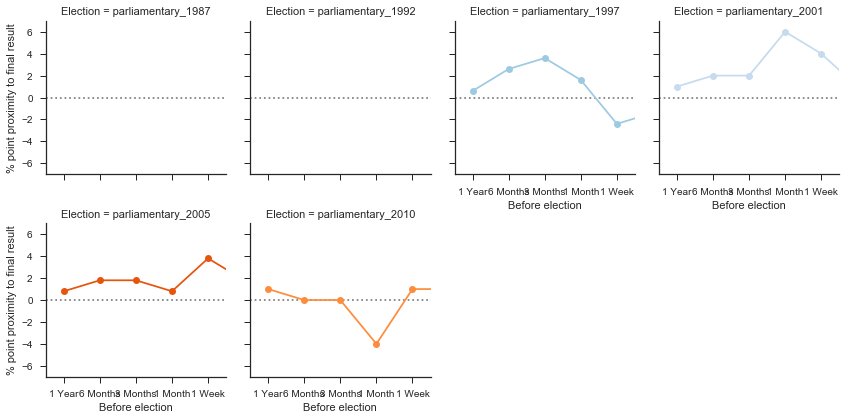

In [85]:
grid = sns.FacetGrid(gdf_num, col="Election", hue="Election", palette="tab20c",
                     col_wrap=4)

grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, 'Before election', '% point proximity to final result', marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5),
         xlim=(-.5, 4.5), ylim=(-7, 7))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

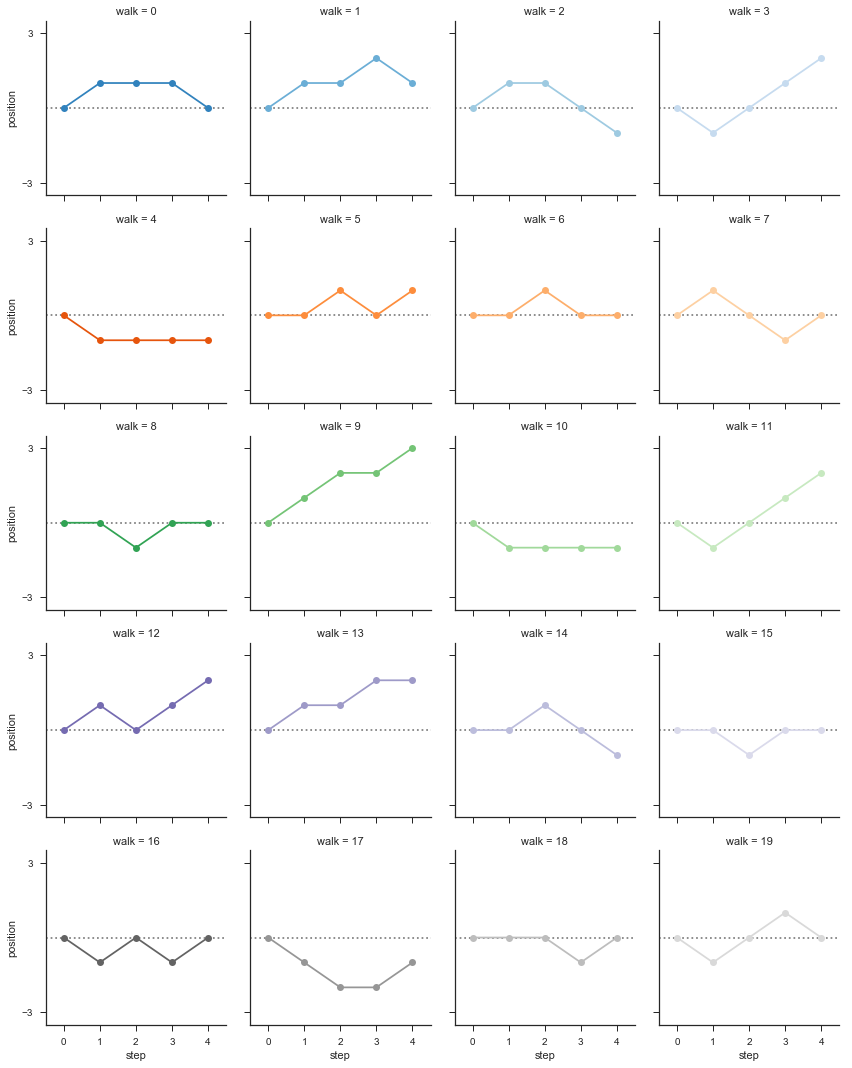

In [78]:
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [45]:
df = pd.read_csv(get_path('separated/polls-guardian-1987.csv'))

df.insert(0, 'Publisher', 'Guardian')
df.insert(0, 'Election', 'parliamentary_1987')

df2 = pd.read_csv(get_path('separated/polls-guardian-2001.csv'))

df2.insert(0, 'Publisher', 'Guardian')
df2.insert(0, 'Election', 'parliamentary_2001')

In [36]:
df = pd.read_csv(get_path('separated/polls-guardian-1987.csv'))

In [37]:
df.insert(0, 'Publisher', 'Guardian')
df.insert(0, 'Election', 'parliamentary_1987')

In [38]:
df2 = pd.read_csv(get_path('separated/polls-guardian-2001.csv'))

In [39]:
df2.insert(0, 'Publisher', 'Guardian')
df2.insert(0, 'Election', 'parliamentary_2001')

In [48]:
df.append(df2)

,Election,Publisher,Before election,Labour,% point proximity to final result,Conservative,% point proximity to final result.1,Lib Dems (Liberal/SDP in '87),% point proximity to final result.2,average accuracy,Other,Poll Date,"research: James Key, David McCandless, Cal Flyn http://www.informationisbeautiful.net"
0,parliamentary_1987,Guardian,1 Year,39,NaN,33,NaN,26,NaN,NaN,2,June 1986,http://spreadsheets.google.com/ccc?key=phNtm3L...
1,parliamentary_1987,Guardian,6 Months,38,NaN,39,NaN,21,NaN,NaN,2,December 1986,http://spreadsheets.google.com/ccc?key=phNtm3L...
2,parliamentary_1987,Guardian,3 Months,32,NaN,38,NaN,27,NaN,NaN,3,March 1987,http://spreadsheets.google.com/ccc?key=phNtm3L...
3,parliamentary_1987,Guardian,1 Month,29,NaN,43,NaN,25,NaN,NaN,3,8-12 May 1987,http://spreadsheets.google.com/ccc?key=phNtm3L...
4,parliamentary_1987,Guardian,1 Week,34,NaN,44,NaN,20,NaN,NaN,2,04/06/1987,http://spreadsheets.google.com/ccc?key=phNtm3L...
5,parliamentary_1987,Guardian,1 Day,32,NaN,43,NaN,23,NaN,NaN,2,10/06/1987,http://spreadsheets.google.com/ccc?key=phNtm3L...
6,parliamentary_1987,Guardian,Actual Share of Vote,32,NaN,43,NaN,23,NaN,NaN,2,11/06/1987,http://spreadsheets.google.com/ccc?key=phNtm3L...
7,parliamentary_1987,Guardian,Actual Number of Seats,376,NaN,229,NaN,22,NaN,NaN,23,11/06/1987,http://en.wikipedia.org/wiki/United_Kingdom_ge...
8,parliamentary_1987,Guardian,Actual Share of Seats,57.85%,NaN,35.23%,NaN,3.38%,NaN,NaN,3.54%,11/06/1987,http://en.wikipedia.org/wiki/United_Kingdom_ge...
0,parliamentary_2001,Guardian,1 Year,43,1.0,32,-0.7,17,-1.8,1.17,8,23-26 June 2000,http://spreadsheets.google.com/ccc?key=phNtm3L...


In [23]:
df.transpose()

,0,1,2,3,4,5,6,7,8
Before election,1 Year,6 Months,3 Months,1 Month,1 Week,1 Day,Actual Share of Vote,Actual Number of Seats,Actual Share of Seats
Labour,39,38,32,29,34,32,32,376,57.85%
% point proximity to final result,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Conservative,33,39,38,43,44,43,43,229,35.23%
% point proximity to final result.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lib Dems (Liberal/SDP in '87),26,21,27,25,20,23,23,22,3.38%
% point proximity to final result.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other,2,2,3,3,2,2,2,23,3.54%
Poll Date,June 1986,December 1986,March 1987,8-12 May 1987,04/06/1987,10/06/1987,11/06/1987,11/06/1987,11/06/1987


In [44]:
df.merge(df2,on='Before election')

,Election,Publisher_x,Before election_x,Labour_x,% point proximity to final result_x,Conservative_x,% point proximity to final result.1_x,Lib Dems (Liberal/SDP in '87)_x,% point proximity to final result.2_x,average accuracy_x,...,Labour_y,% point proximity to final result_y,Conservative_y,% point proximity to final result.1_y,Lib Dems (Liberal/SDP in '87)_y,% point proximity to final result.2_y,average accuracy_y,Other_y,Poll Date_y,"research: James Key, David McCandless, Cal Flyn http://www.informationisbeautiful.net_y"


In [27]:
pd.Panel4D([df, df2])

AttributeError: module 'pandas' has no attribute 'Panel4D'